# **\[SOLAR_A\]** Setting

JiyunLim  
2023-08-30

# Load Data

In [125]:
# read dataframe 
df = pd.read_csv('data_eng_230710.csv')

# make y, y_upper, y_period, time, regions 
y = df.loc[:,'Bukchoncheon':'Gyeongju-si'].to_numpy()
yU = df.loc[:,'Bukchoncheon_Upper':'Gyeongju-si_Upper'].to_numpy()
yP = np.divide(y, yU+1e-10)

t = df.loc[:,'date']
regions = list(df.loc[:, 'Bukchoncheon':'Gyeongju-si'].columns)

In [4]:
# global parameters
TRAIN_RATIO = 0.8
T, N = len(t), len(regions)
LEN_TEST = int(np.floor(T*(1-TRAIN_RATIO)))
LEN_TR = T - LEN_TEST

# GC-LSTM

> 5epoch: lag=24, batch size=128, lr=50/1000 // batch size=24,
> lr=10/1000

In [30]:
%run eptrgcn/glstm

In [164]:
# create lrnr object
lrnr = RGCN_Learner()
# load data
lrnr.lags = 24
lrnr.train_ratio = 0.8
lrnr.load(y)
# construct network
lrnr.nof_filters = 16
lrnr.model = GC_LSTM(node_features=lrnr.lags, filters=lrnr.nof_filters).to(device)
lrnr.optimizer = torch.optim.Adam(lrnr.model.parameters(), lr=50/1000)
# learn
lrnr.get_batches(128)
for e in range(5):
    lrnr.learn()

epoch=1  loss=0.6976798325777054806987762   
epoch=2  loss=0.1561368983238935502418518   
epoch=3  loss=0.1187518569640815364446259   
epoch=4  loss=0.1071903044357895973303986   
epoch=5  loss=0.0988437780179083320381927   

In [165]:
yhat = np.concatenate([np.array([list(lrnr.yhat[0])]*lrnr.lags),lrnr.yhat],axis=0)
yhat[yhat<0] = 0

In [166]:
((y - yhat)[LEN_TR:,:]**2).mean()

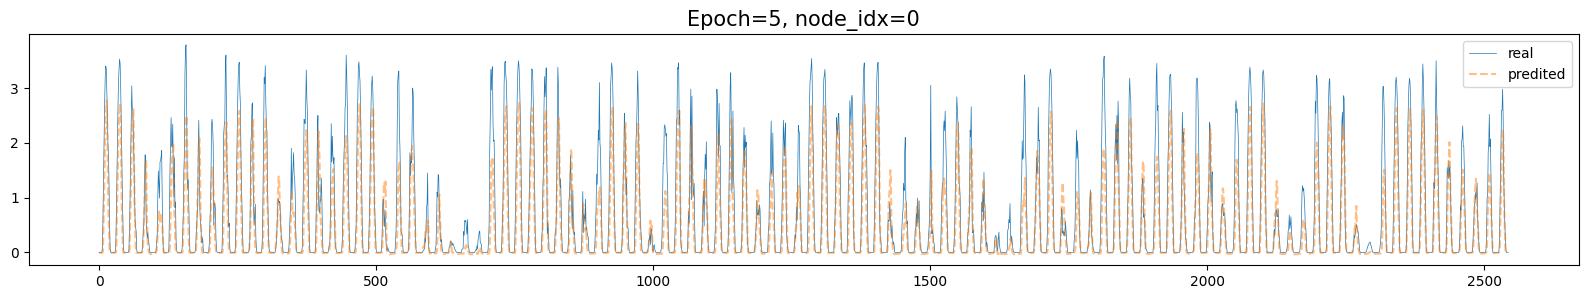

In [167]:
lrnr.figs[-1]

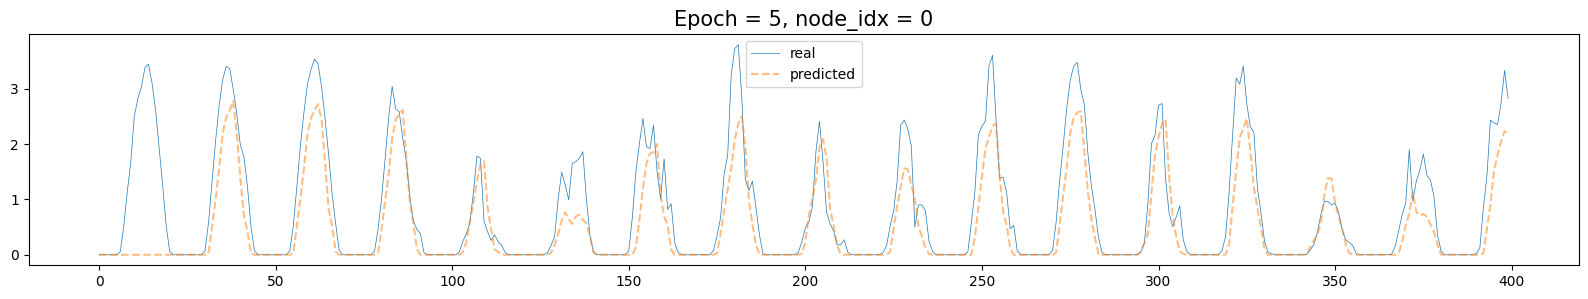

In [168]:
rslt_plot(lrnr, y, yhat, 400, 0)

In [175]:
lrnr1 = RGCN_Learner()
lrnr1.lags = 1
lrnr1.train_ratio = 0.8
lrnr1.load(yU)

lrnr1.nof_filters = 16
lrnr1.model = GC_LSTM(node_features=lrnr1.lags, filters=lrnr1.nof_filters).to(device)
lrnr1.optimizer = torch.optim.Adam(lrnr1.model.parameters(), lr=10/1000)

lrnr1.get_batches(24)
for e in range(5):
    lrnr1.learn()

epoch=1  loss=1.391538996336072231895447    
epoch=2  loss=0.598248734203882863609314    
epoch=3  loss=0.359663419425487576181793    
epoch=4  loss=0.0656015664382382900326347   
epoch=5  loss=0.019787185912042163754199            

In [176]:
yUhat = np.concatenate([np.array([list(lrnr1.yhat[0])]*lrnr1.lags),lrnr1.yhat],axis=0)
yU_mse = np.mean((yU - yUhat)[LEN_TR:,:]**2)
yU_mse

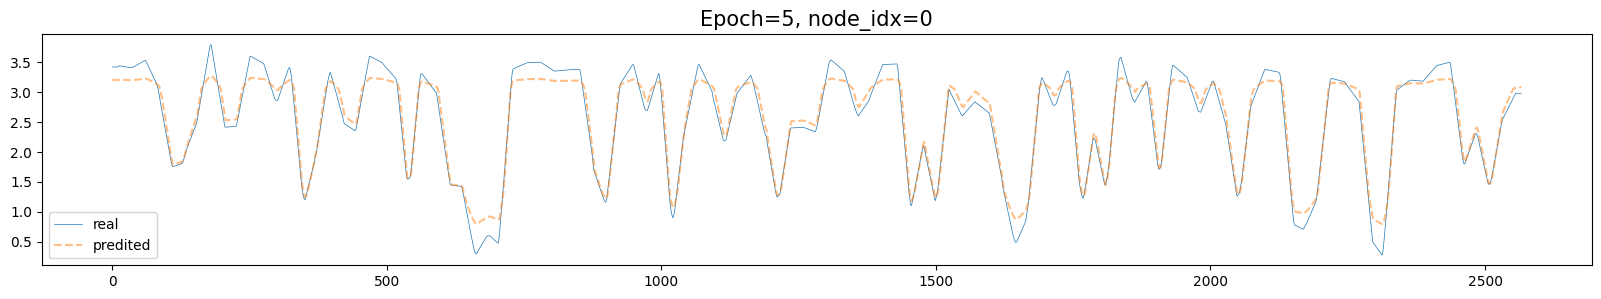

In [177]:
lrnr1.figs[-1]

In [169]:
lrnr2 = RGCN_Learner()
lrnr2.lags = 24
lrnr2.train_ratio = 0.8
lrnr2.load(yP)

lrnr2.nof_filters = 16
lrnr2.model = GC_LSTM(node_features=lrnr2.lags, filters=lrnr2.nof_filters).to(device)
lrnr2.optimizer = torch.optim.Adam(lrnr2.model.parameters(), lr=50/1000)

lrnr2.get_batches(128)
for e in range(5):
    lrnr2.learn()

epoch=1  loss=0.0422495962120592638679695       
epoch=2  loss=0.01952421932946890624313164  
epoch=3  loss=0.01488380518276244467597675  
epoch=4  loss=0.0131311484146863221497202       
epoch=5  loss=0.01250567828537896350158596  

In [180]:
for e in range(5):
    lrnr2.learn()

epoch=6  loss=0.01207461231388151644636536  
epoch=7  loss=0.01155435323016718125264168  
epoch=8  loss=0.01128861168399453214192772  
epoch=9  loss=0.01120449064183048918804646  
epoch=10     loss=0.0111838685697875927149105   

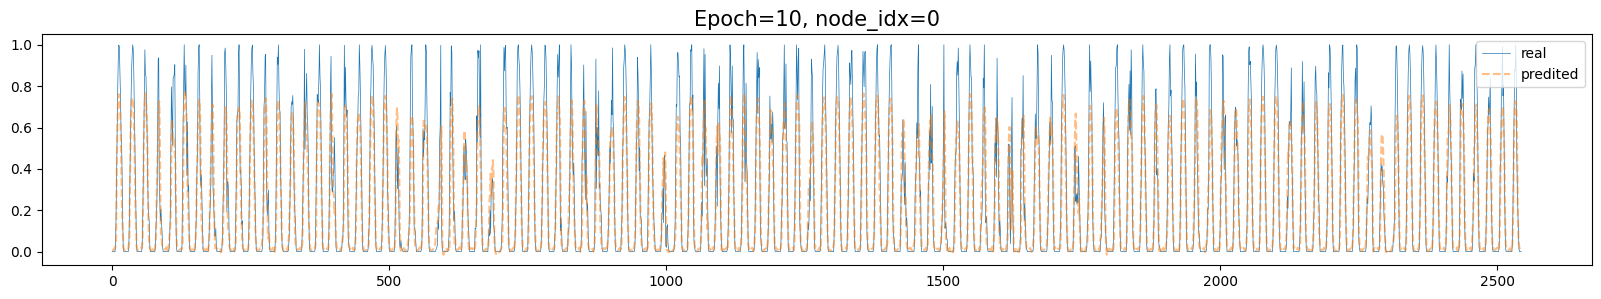

In [181]:
lrnr2.figs[-1]

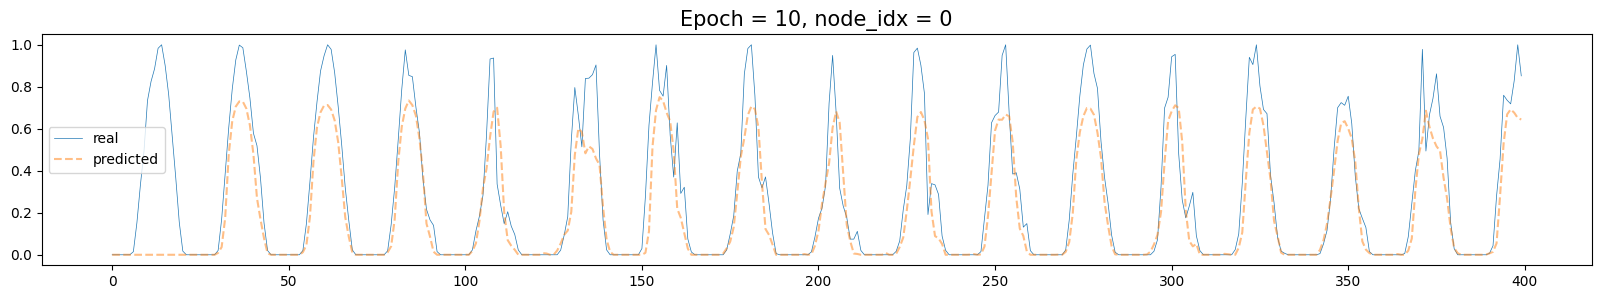

In [182]:
rslt_plot(lrnr2, yP, yPhat, 400, 0)

In [172]:
yPhat = np.concatenate([np.array([list(lrnr2.yhat[0])]*lrnr2.lags),lrnr2.yhat],axis=0)
yPhat[yPhat<0] = 0

In [158]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

In [173]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

In [178]:
((y - yUhat*yPhat)[LEN_TR:,:]**2).mean()

In [89]:
classic = ((y - yhat)[LEN_TR:,:]**2).mean()
proposed = ((y - yUhat*yPhat)[LEN_TR:,:]**2).mean()
print('classic(mse)', round(classic,4))
print('proposed(mse)', round(proposed,4))

classic(mse) 0.1235
proposed(mse) 0.072

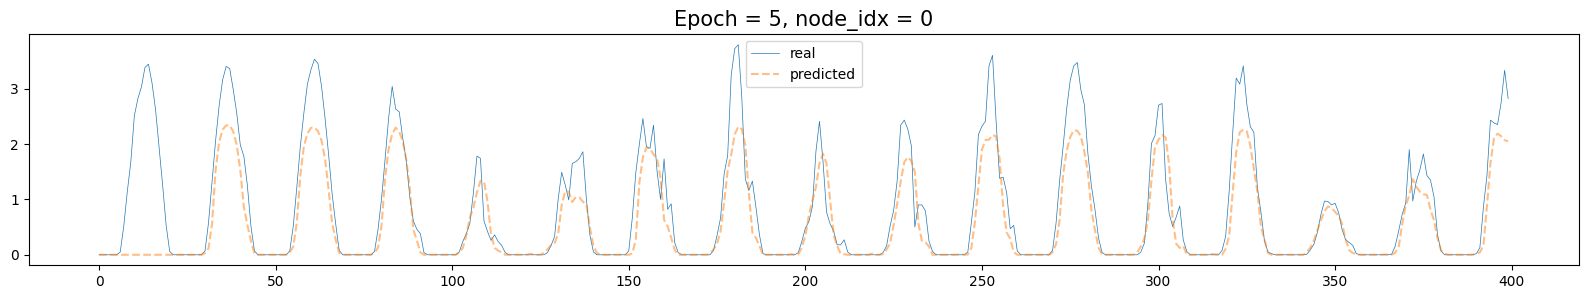

In [179]:
rslt_plot(lrnr, y, yUhat*yPhat, 400, 0)

# LRGCN

> epoch:5, lags=24, batch size=128, lr=50/1000

In [117]:
# create lrnr object
lrnr = RGCN_Learner()
# load data
lrnr.lags = 24
lrnr.train_ratio = 0.8
lrnr.load(y)
# construct network
lrnr.nof_filters = 16
lrnr.model = LR_GCN(node_features=lrnr.lags, filters=lrnr.nof_filters).to(device)
lrnr.optimizer = torch.optim.Adam(lrnr.model.parameters(), lr=50/1000)
# learn
lrnr.get_batches(128)
for e in range(5):
    lrnr.learn()

epoch=1  loss=0.4337664144113665983715057       
epoch=2  loss=0.151776050683110953537445        
epoch=3  loss=0.1048065312206745145849991       
epoch=4  loss=0.0989261488430202171957016       
epoch=5  loss=0.0955046000890433838219833       

In [118]:
yhat = np.concatenate([np.array([list(lrnr.yhat[0])]*lrnr.lags),lrnr.yhat],axis=0)
yhat[yhat<0] = 0

In [120]:
((y - yhat)[LEN_TR:,:]**2).mean()

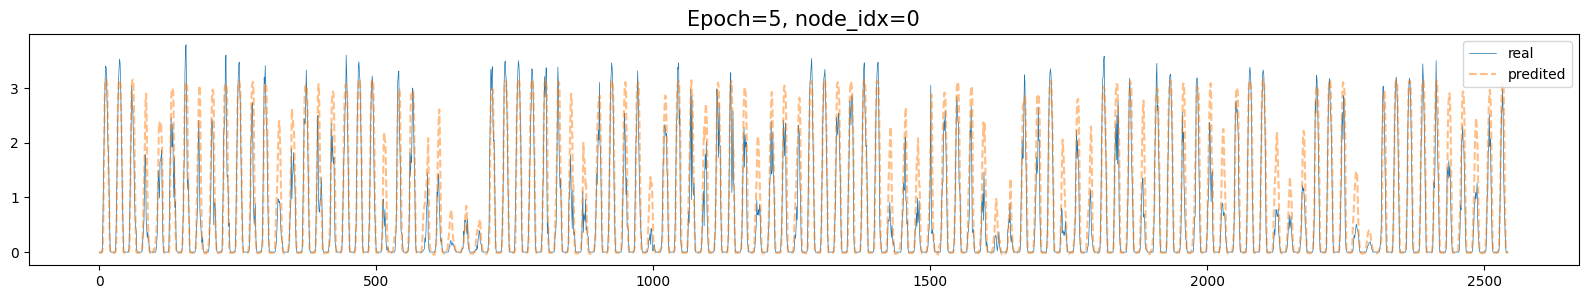

In [121]:
lrnr.figs[-1]

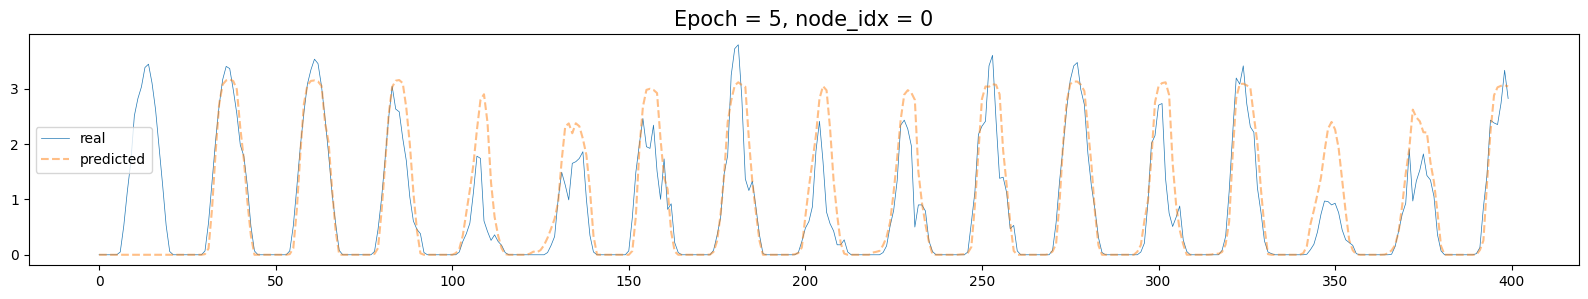

In [122]:
rslt_plot(lrnr, y, yhat, 400, 0)

In [102]:
lrnr1 = RGCN_Learner()

lrnr1.lags = 4
lrnr1.train_ratio = 0.8
lrnr1.load(yU)

lrnr1.nof_filters = 16
lrnr1.model = LR_GCN(node_features=lrnr1.lags, filters=lrnr1.nof_filters).to(device)
lrnr1.optimizer = torch.optim.Adam(lrnr1.model.parameters(), lr=10/1000)

lrnr1.get_batches(24)
for e in range(5):
    lrnr1.learn()

epoch=1  loss=1.064265375740306250001144        
epoch=2  loss=0.0474877264783826322301865   
epoch=3  loss=0.025063200702154364499035        
epoch=4  loss=0.018209673215223605731579        
epoch=5  loss=0.0140215668957247313749313       

In [103]:
yUhat = np.concatenate([np.array([list(lrnr1.yhat[0])]*lrnr1.lags),lrnr1.yhat],axis=0)
yU_mse = np.mean((yU - yUhat)[LEN_TR:,:]**2)
yU_mse

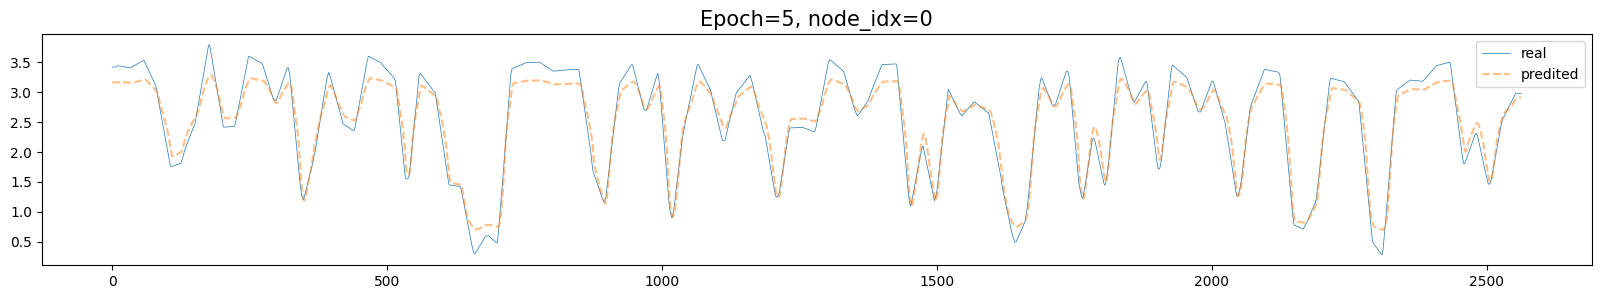

In [104]:
lrnr1.figs[-1]

In [111]:
lrnr2 = RGCN_Learner()
lrnr2.lags = 24
lrnr2.train_ratio = 0.8
lrnr2.load(yP)

lrnr2.nof_filters = 16
lrnr2.model = LR_GCN(node_features=lrnr2.lags, filters=lrnr2.nof_filters).to(device)
lrnr2.optimizer = torch.optim.Adam(lrnr2.model.parameters(), lr=50/1000)

lrnr2.get_batches(128)
for e in range(5):
    lrnr2.learn()

epoch=1  loss=0.03597257088404149159944534  
epoch=2  loss=0.01735318906139582426729107  
epoch=3  loss=0.01450545119587332572007656  
epoch=4  loss=0.01319235184928402387396336  
epoch=5  loss=0.01257636828813701931894016  

In [112]:
yPhat = np.concatenate([np.array([list(lrnr2.yhat[0])]*lrnr2.lags), lrnr2.yhat], axis=0)
yP_mse = ((yP-yPhat)[LEN_TR:,:]**2).mean()
yP_mse

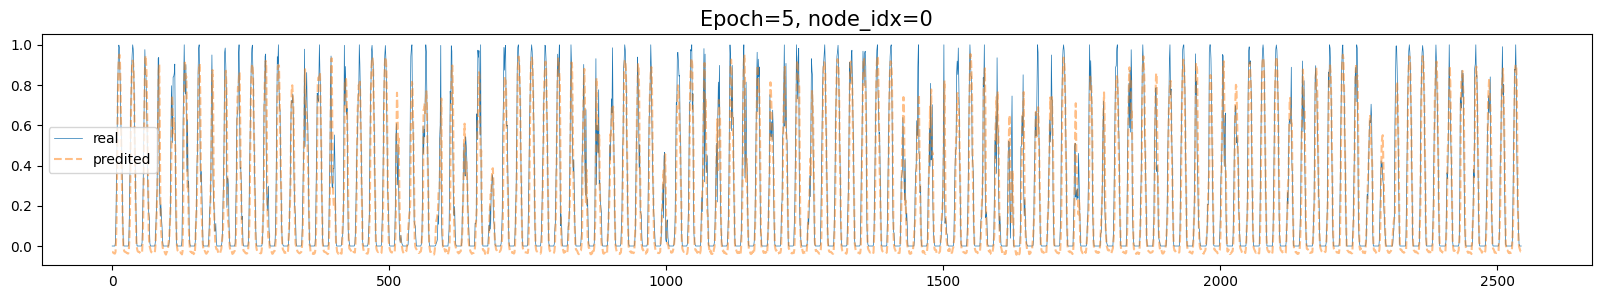

In [113]:
lrnr2.figs[-1]

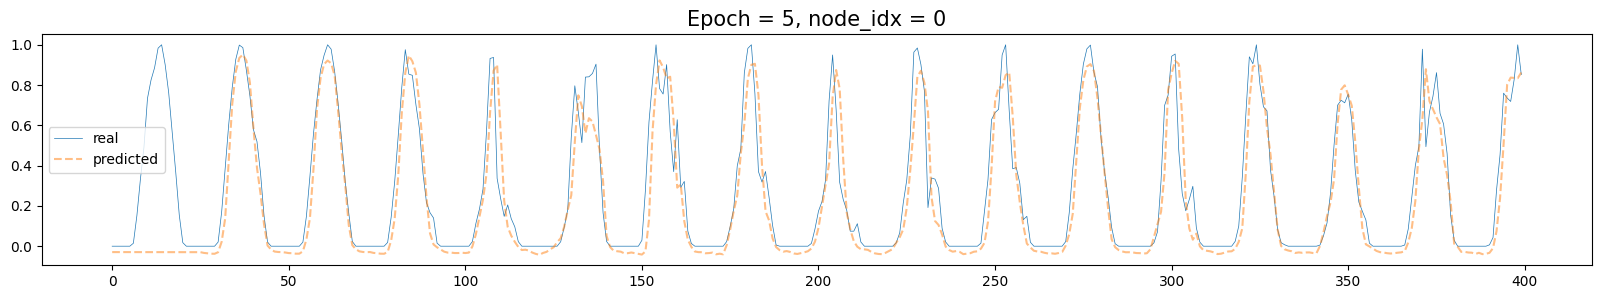

In [114]:
rslt_plot(lrnr2, yP, yPhat, 400, 0)

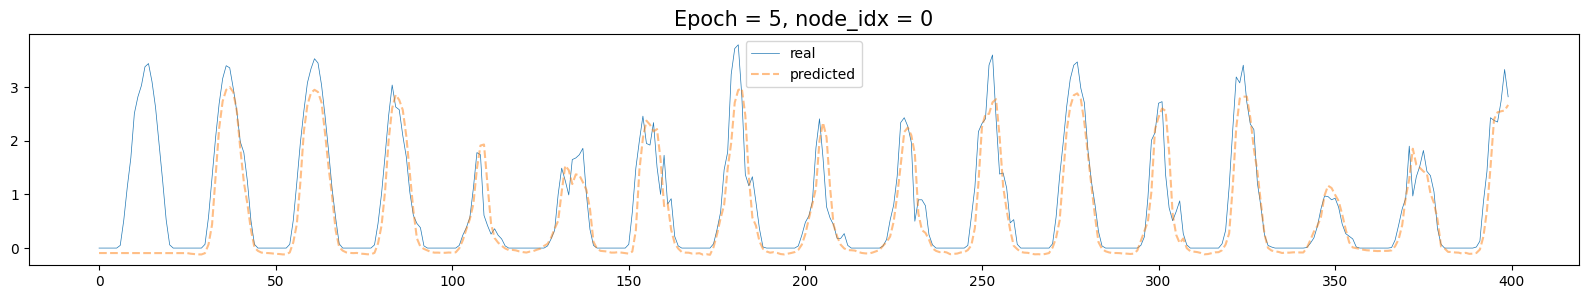

In [115]:
rslt_plot(lrnr2, y, yUhat*yPhat, 400, 0)

In [123]:
classic = ((y - yhat)[LEN_TR:,:]**2).mean()
proposed = ((y - yUhat*yPhat)[LEN_TR:,:]**2).mean()
print('classic(mse)', round(classic,4))
print('proposed(mse)', round(proposed,4))

classic(mse) 0.1931
proposed(mse) 0.0857